<a href="https://colab.research.google.com/github/ardabyr/Math/blob/main/main_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# Курсовая работа на тему
# «Метод наименьших квадратов»
### Описание модели
</center>



Модель полезного сигнала имеет вид (1):

$$\phi(x) = \theta_0 + \theta_1 x + \ldots + \theta_m x^m. $$

Рассматривается модель наблюдений (2):
$$ y_k = \theta_0 + \theta_1 x_k + \ldots + \theta_m x_k^m + \varepsilon_k, \quad k=\overline{1, n}, $$
где $\varepsilon_1, \ldots, \varepsilon_n $  – независимые центрированные и одинаково распределённые случайные величины.
<center>

### Моделирование данных
Смоделировать два набора наблюдений на основе модели (2) для следующих случаев:

$$ m=3, \qquad \varepsilon_k \sim N(0, \sigma^2) $$

$$ m=2, \qquad \varepsilon_k \sim R(-3\sigma, 3\sigma) $$

$$x_k=-4+k\frac{8}{n}, \qquad k = \overline{1,n} , \qquad n=40$$

### Вариант № 10

$$\theta_0 = (-1)^{N+1}\frac{N}{2} = (-1)^{10+1}\frac{10}{2} = -5$$

$$\theta_1 = 4$$

$$\theta_2 = -1$$

$$\theta_3 = -0.02$$

$$\sigma^2 = 1.1$$
<center>



### <center>  Задание  <center>
Для обоих случаев выполнить по очереди следующие задания.
1. Подобрать порядок многочлена $\hat{m} \ge 1$ в модели (1), используя критерий Фишера на уровне значимости 0.05, и вычислить оценки неизвестных параметров $(\theta_0, \ldots, \theta_{\hat{m}})$ методом наименьших квадратов.
2. В предположении нормальности ошибок построить доверительные интервалы уровней
надёжности $\alpha_1 = 0.95$ и $\alpha_2 = 0.99$ для параметров $(\theta_0, \ldots, \theta_{\hat{m}})$.
3. В предположении нормальности ошибок построить доверительные интервалы уровней.
надёжности $\alpha_1 = 0.95$ и $\alpha_2 = 0.99$ для полезного сигнала (1).
4. Представить графически
\
$\bullet$ истинный полезный сигнал,
\
$\bullet$ набор наблюдений,
\
$\bullet$ оценку полезного сигнала, полученную в шаге 1,
\
$\bullet$ доверительные интервалы полезного сигнала, полученные в шаге 3.
5. По остаткам регрессии построить оценку плотности распределения случайной ошибки
наблюдения в виде гистограммы.
6. В предположении нормальности ошибок вычислить оценку максимального правдоподобия
дисперсии $\sigma^2$ случайной ошибки.
7. По остаткам регрессии с помощью &chi;² критерия Пирсона на уровне значимости 0.05 проверить
гипотезу о том, что закон распределения ошибки наблюдения является нормальным.

### <center>  Решение  <center>

#### Импортирование библиотек

In [ ]:
import numpy as np
import statsmodels.api as sm

#### Импортирование реализованных функций и классов

In [ ]:
from distribution import Distribution
from statistic import (t_test, calculate_confidence_interval_w,
                       calculate_confidence_interval_phi, chi2_test)
from graphics import (plot_phi, plot_phi_estimation,
                      plot_phi_intervals, plot_hist)

#### Конфигурация графиков

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['font.size'] = 14

### <center> Генерация данных <center>

In [ ]:
theta = np.array([-5, 4, -1, -0.02])
var = 1.1
n = 40
m = 3
normal_distribution = True
seed = 22

norm = Distribution(theta, var, n, m, normal_distribution, seed)

### <center> № 1 <center>

Найдем порядок  многочлена, используя критерий Стьюдента на уровне значимости 0.05.
\
Поряд многочлена отпределяется коэффициентом при $ x_k^m $.
\
Если $\theta_m = 0$, то порядок многочлена равен $m - 1$, иначе порядок многочлена $\ge m$
\
$H_0: \hat{\theta}_{\hat{m}} = 0$
\
$H_1: \hat{\theta}_{\hat{m}} \neq 0$
\
\
Для этого воспользуемся формулами:

$$MSE = \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{n - \hat{m} - 1}$$

$$SE = \sqrt{diag(MSE*(X^TX)^{-1})}$$

$$t_i = \frac{\hat{\theta}_i}{SE},$$
где:
\
$y_i$- Зависимая переменная для $i^{ого}$ объекта
\
$\hat{y}_i$- Предсказание модели для $i^{ого}$ объекта
\
$n$- Количество объектов
\
$\hat{m}$- Степень многочлена
\
$MSE$ - Среднеквадратичное отклонение, оценка дисперсии ошибок
\
$X$- Матрица признаков
\
$SE$- Стандартная ошибка
\
$\hat{\theta}_i$ - Оценка весов модели
\
$t_i$- Распределение Стьюдента с $n - \hat{m} - 1$ степенями свободы.


In [ ]:
estimate_m = 2
while t_test(norm.x_k, norm.y, estimate_m, 0.05):
    estimate_m += 1

Степень многочлена = 2 является статистически значимым.
Степень многочлена = 3 не является статистически значимым.
Степень многочлена равна 2


In [ ]:
norm = Distribution(theta, var, n, estimate_m - 1, normal_distribution, seed)

In [ ]:
for i in range(len(norm.w)):
    print(f'theta_{i} = {norm.w[i]}')

theta_0 = -4.686581868205277
theta_1 = 3.9911686000797486
theta_2 = -1.061222975732632


In [ ]:
print("Шум")
print(norm.eps)

Шум
[-0.10114491 -1.60968572  1.18997085 -0.26325769 -0.54024205 -1.10249921
  1.01070365 -1.21399531  0.6891428  -0.61766516  0.03174063 -0.25384391
  0.64652744  0.82754934 -1.16435281  1.16156966  0.82252529  1.17114425
  1.67214255 -1.63746323  2.04598888 -1.75847433 -0.71068097  0.3710575
  1.1514016   0.69205767  0.399365    0.61132467 -1.19740449  0.02606425
  2.7490943  -2.73903343 -0.25834863 -0.10731981 -0.97518228 -0.15038456
  0.11217682 -0.27602249 -0.08669353 -1.19368058]


In [ ]:
print("Признак x")
print(norm.x_k)

Признак x
[-3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4 -2.2 -2.  -1.8 -1.6 -1.4 -1.2
 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6
  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  4. ]


In [ ]:
print("Зависимая переменная y")
print(norm.y)

Зависимая переменная y
[-34.74114491 -33.96968572 -28.97002915 -28.30325769 -26.54024205
 -25.14249921 -21.14929635 -21.57399531 -17.9508572  -17.61766516
 -15.40825937 -14.21384391 -11.91347256 -10.41245066 -11.16435281
  -7.67843034  -6.93747471  -5.58885575  -4.16785745  -6.63746323
  -2.19401112  -5.31847433  -3.67068097  -2.0689425   -0.8485984
  -0.94794233  -0.960635    -0.54867533  -2.23740449  -0.97393575
   1.7090943   -3.89903343  -1.61834863  -1.74731981  -2.97518228
  -2.59038456  -2.84782318  -3.83602249  -4.32669353  -6.19368058]


Сравним с готовой реализацией в пакете STATSMODELS

In [ ]:
distr_packet = sm.OLS(norm.phi + norm.eps, sm.add_constant(norm.X))
distr_fitted = distr_packet.fit()
print(distr_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1630.
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           8.49e-37
Time:                        19:03:18   Log-Likelihood:                -59.625
No. Observations:                  40   AIC:                             125.3
Df Residuals:                      37   BIC:                             130.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6866      0.265    -17.692      0.0

### <center> № 2 <center>

Доверительный интервал для параметра $\theta_i$ с уровнем значимости $1 - \alpha$ будет иметь вид:
$$\hat{\theta_i} \pm t_{\alpha/2} * SE$$
$$MSE = \frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{n-\hat{m}-1}$$
$$SE = \sqrt{diag(MSE*(X^TX)^{-1})},$$
где:
\
$\theta_i$- Вес модели
\
$\hat{\theta}_i$ - Оценка весов модели
\
$t_{\alpha/2}$- Значение распределения Стьюдента с $(n - \hat{m} - 1)$ степенями свободы для уровня ${\alpha / 2}$
\
$SE$- Стандартная ошибка
\
$\alpha$- Уровень значимости
\
$y_i$- Зависимая переменная для $i^{ого}$ объекта
\
$\hat{y}_i$- Предсказание модели для $i^{ого}$ объекта
\
$n$- Количество объектов
\
$\hat{m}$- Степень многочлена
\
$MSE$ - Среднеквадратичное отклонение, оценка дисперсии ошибок
\
$X$- Матрица признаков.

In [ ]:
for a in (0.95, 0.99):
    print(f"Уровень доверия {a}:")
    for i, w in enumerate(norm.w):
        l, r = calculate_confidence_interval_w(norm.se[i], w, norm.n, norm.m, a)
        print(f"\tTheta_{i}={w}:")
        print(f"\t\tДоверительный интервал {l, r}")
    print()

Уровень доверия 0.95:
	Theta_0=-4.686581868205277:
		Доверительный интервал (-5.2233168178409946, -4.149846918569559)
	Theta_1=3.9911686000797486:
		Доверительный интервал (3.8354352555677647, 4.146901944591733)
	Theta_2=-1.061222975732632:
		Доверительный интервал (-1.1363592185168077, -0.9860867329484562)

Уровень доверия 0.99:
	Theta_0=-4.686581868205277:
		Доверительный интервал (-5.405889036697379, -3.9672746997131747)
	Theta_1=3.9911686000797486:
		Доверительный интервал (3.782462028695216, 4.1998751714642815)
	Theta_2=-1.061222975732632:
		Доверительный интервал (-1.1619170670805155, -0.9605288843847484)



### <center> № 3 <center>

Доверительный интервал для полезного сигнала $f(x, w)$ с уровнем значимости $1 - \alpha$ будет иметь вид:

$$\hat{f}(x, w) \pm t_{\alpha / 2}\sqrt{MSE * x(X^T X)^{-1} x^T},$$
где:
\
$f(x, w)$- полезный сигнал
\
$x$- аргумент полезного сигнала
\
$w$- веса полезного сигнала
\
$t_{\alpha/2}$ Значение распределения Стьюдента с $(n - \hat{m} - 1)$ степенями свободы для уровня ${\alpha / 2}$
\
$MSE$ - Среднеквадратичное отклонение, оценка дисперсии ошибок
\
$X$- Матрица признаков.

In [ ]:
limits = {}

In [ ]:
for alpha in (0.95, 0.99):
    print(f"Уровень доверия {alpha}:")
    interval, first_interval = calculate_confidence_interval_phi(norm.mse, norm.X, norm.w, norm.n, norm.m, alpha)
    l, r = interval
    l_first, r_first = first_interval
    limits[alpha] = (l[0], r[0])
    print("\tДоверительный интервал:")
    print('\t(')
    print(f"\t{l[0]}")
    print(f"\t{r[0]}")
    print('\t)')
    print(f'Значения в первой т. -3.8 {l_first, r_first}')
    print()

Уровень доверия 0.95:
	Доверительный интервал:
	(
	-1.06122297573263*x**2 + 3.99116860007975*x - 2.26330917533083*sqrt(x**2*(0.00110207507511744*x**2 - 0.000220415015023487*x - 0.00586303939962477) - 0.00586303939962477*x**2 + x*(-0.000220415015023487*x**2 + 0.00473451452270451*x + 0.000703564727954972) + 0.000703564727954972*x + 0.0562382739212008) - 4.68658186820528
	-1.06122297573263*x**2 + 3.99116860007975*x + 2.26330917533083*sqrt(x**2*(0.00110207507511744*x**2 - 0.000220415015023487*x - 0.00586303939962477) - 0.00586303939962477*x**2 + x*(-0.000220415015023487*x**2 + 0.00473451452270451*x + 0.000703564727954972) + 0.000703564727954972*x + 0.0562382739212008) - 4.68658186820528
	)
Значения в первой т. -3.8 (-36.19913585822091, -34.1550287779541)

Уровень доверия 0.99:
	Доверительный интервал:
	(
	-1.06122297573263*x**2 + 3.99116860007975*x - 3.03318149010857*sqrt(x**2*(0.00110207507511744*x**2 - 0.000220415015023487*x - 0.00586303939962477) - 0.00586303939962477*x**2 + x*(-0.00022

### <center> № 4 <center>

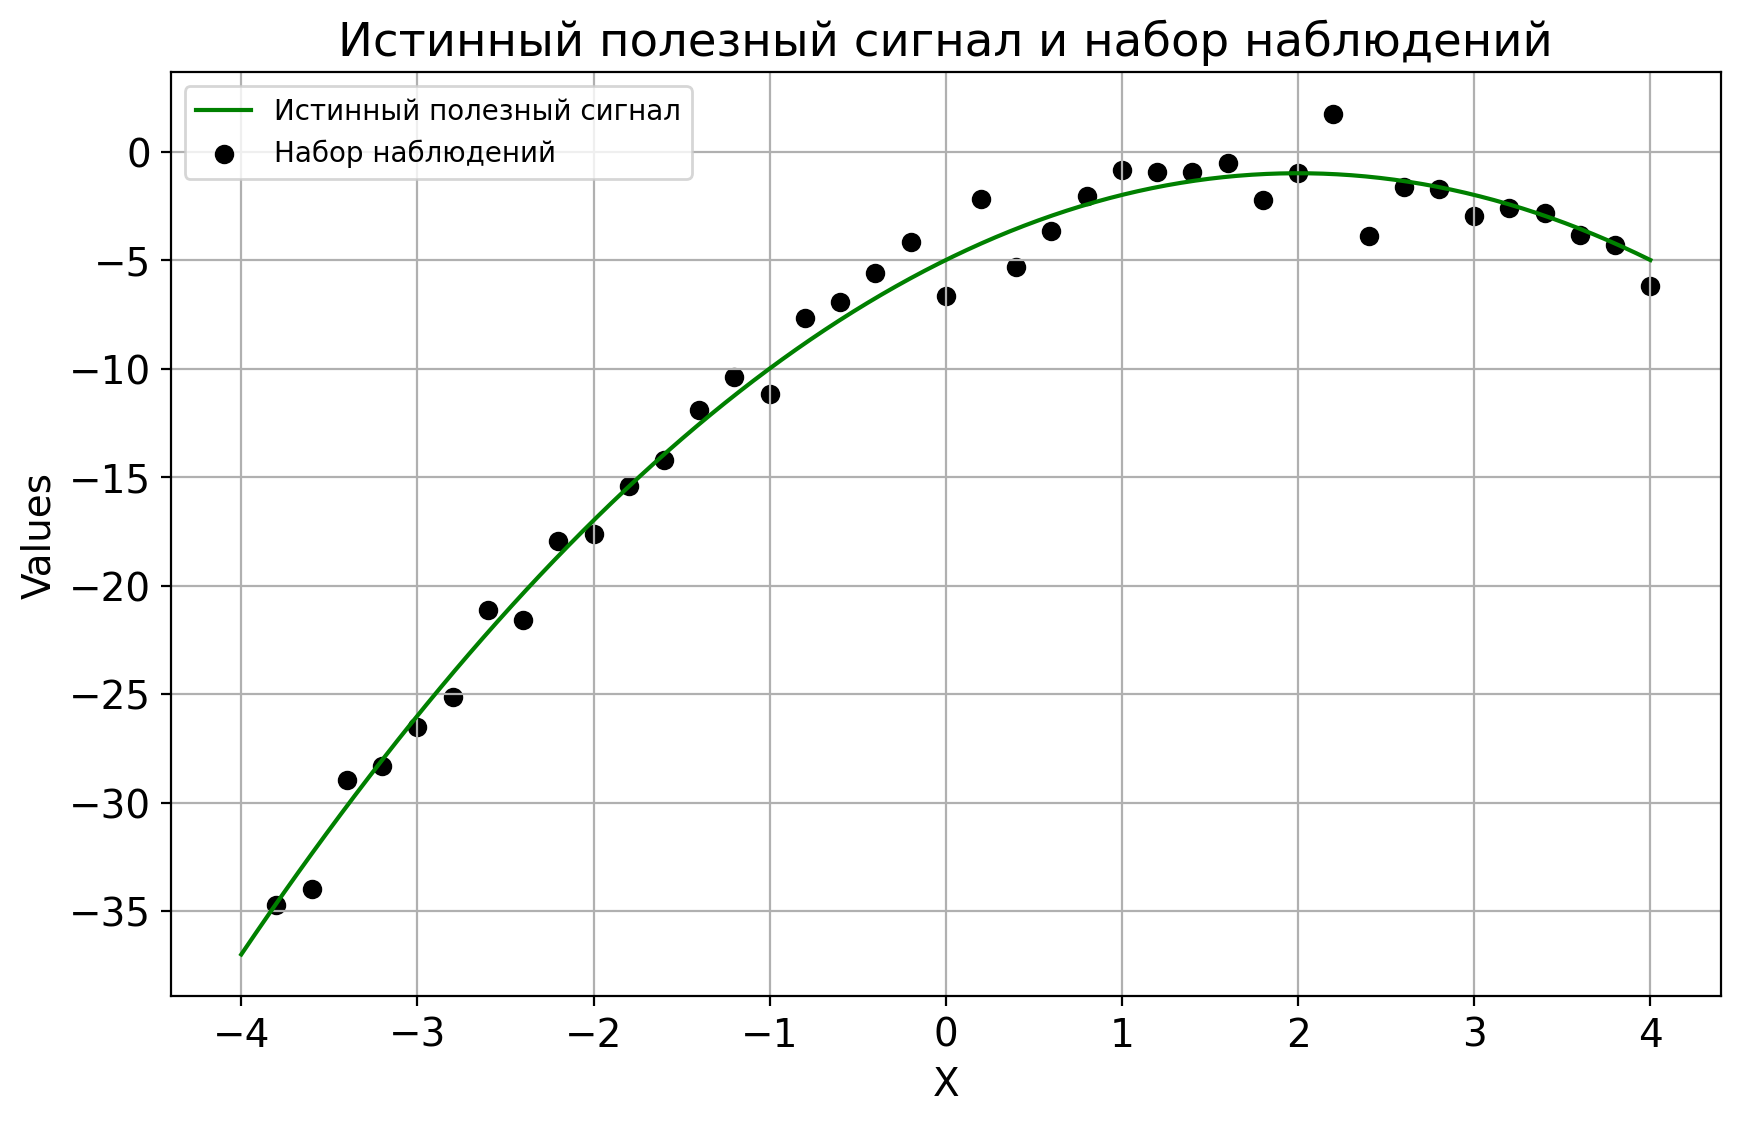

In [ ]:
plot_phi(norm.x_k, norm.theta, norm.y, norm.m)

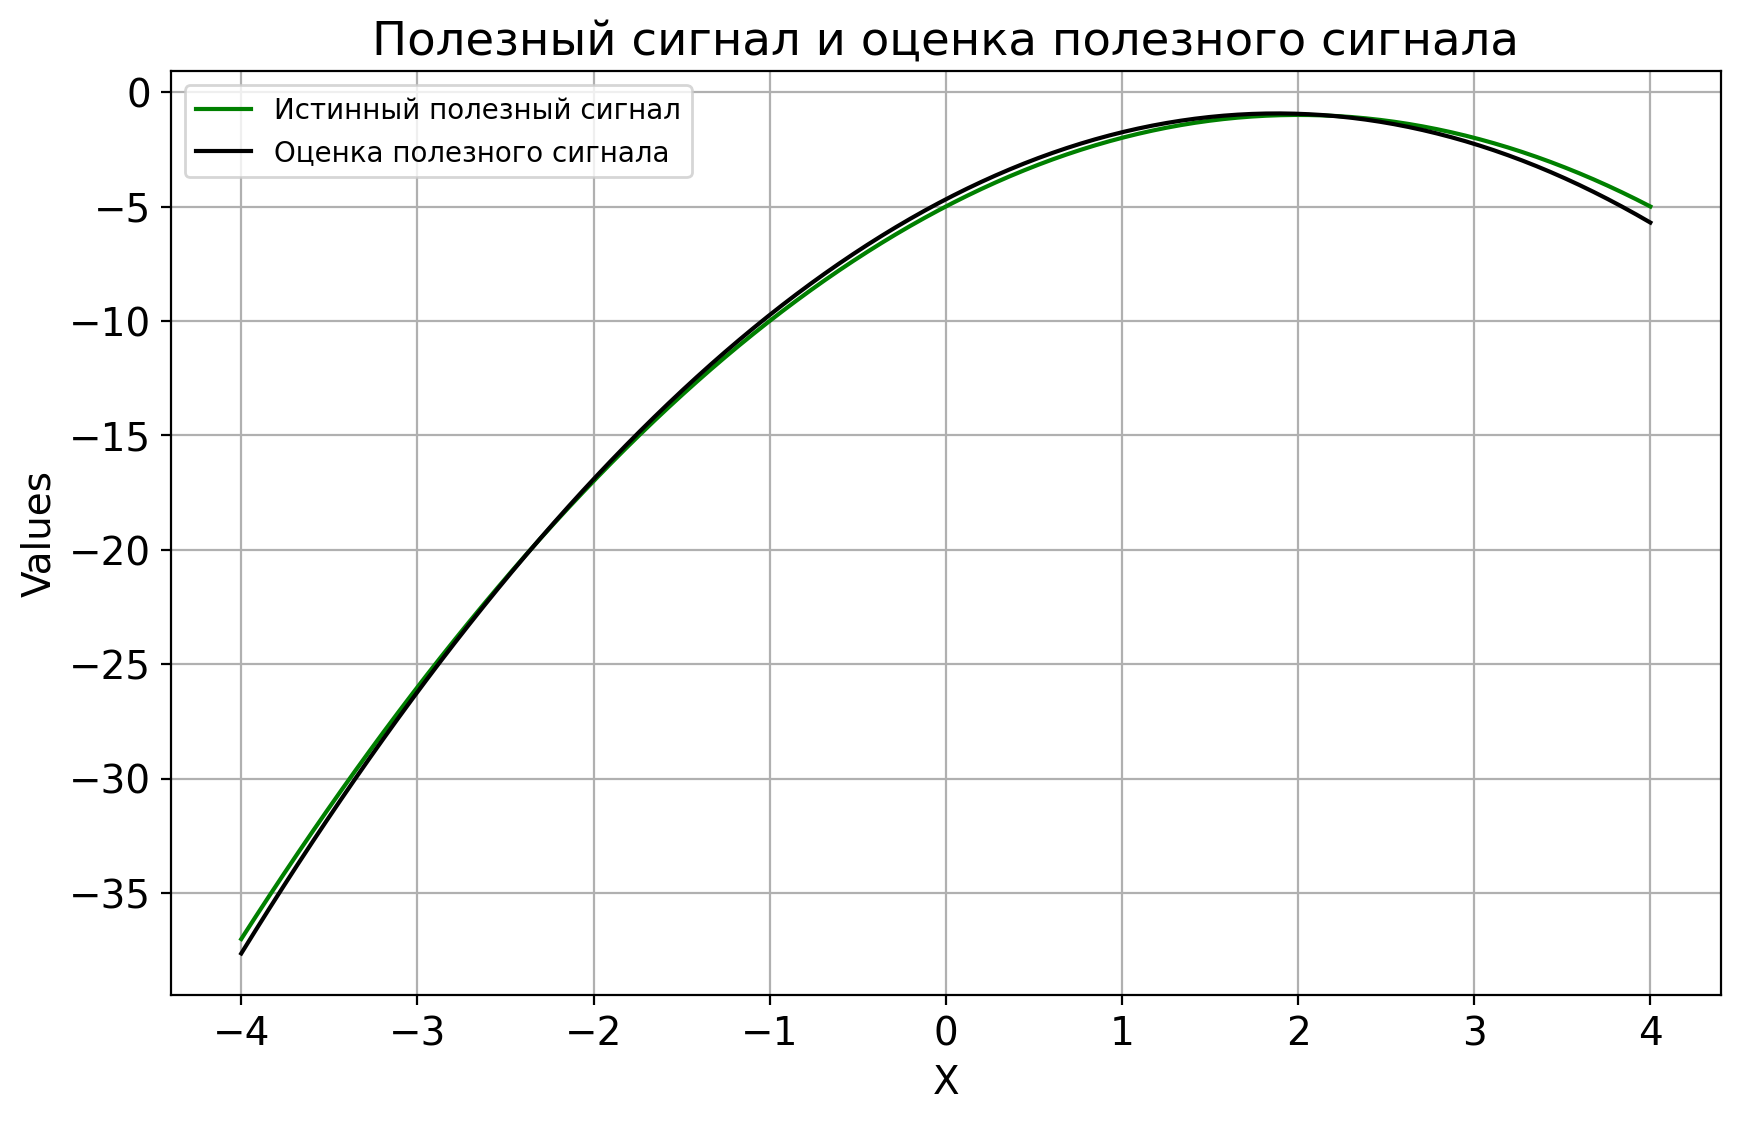

In [ ]:
plot_phi_estimation(norm.theta, norm.w, norm.m)

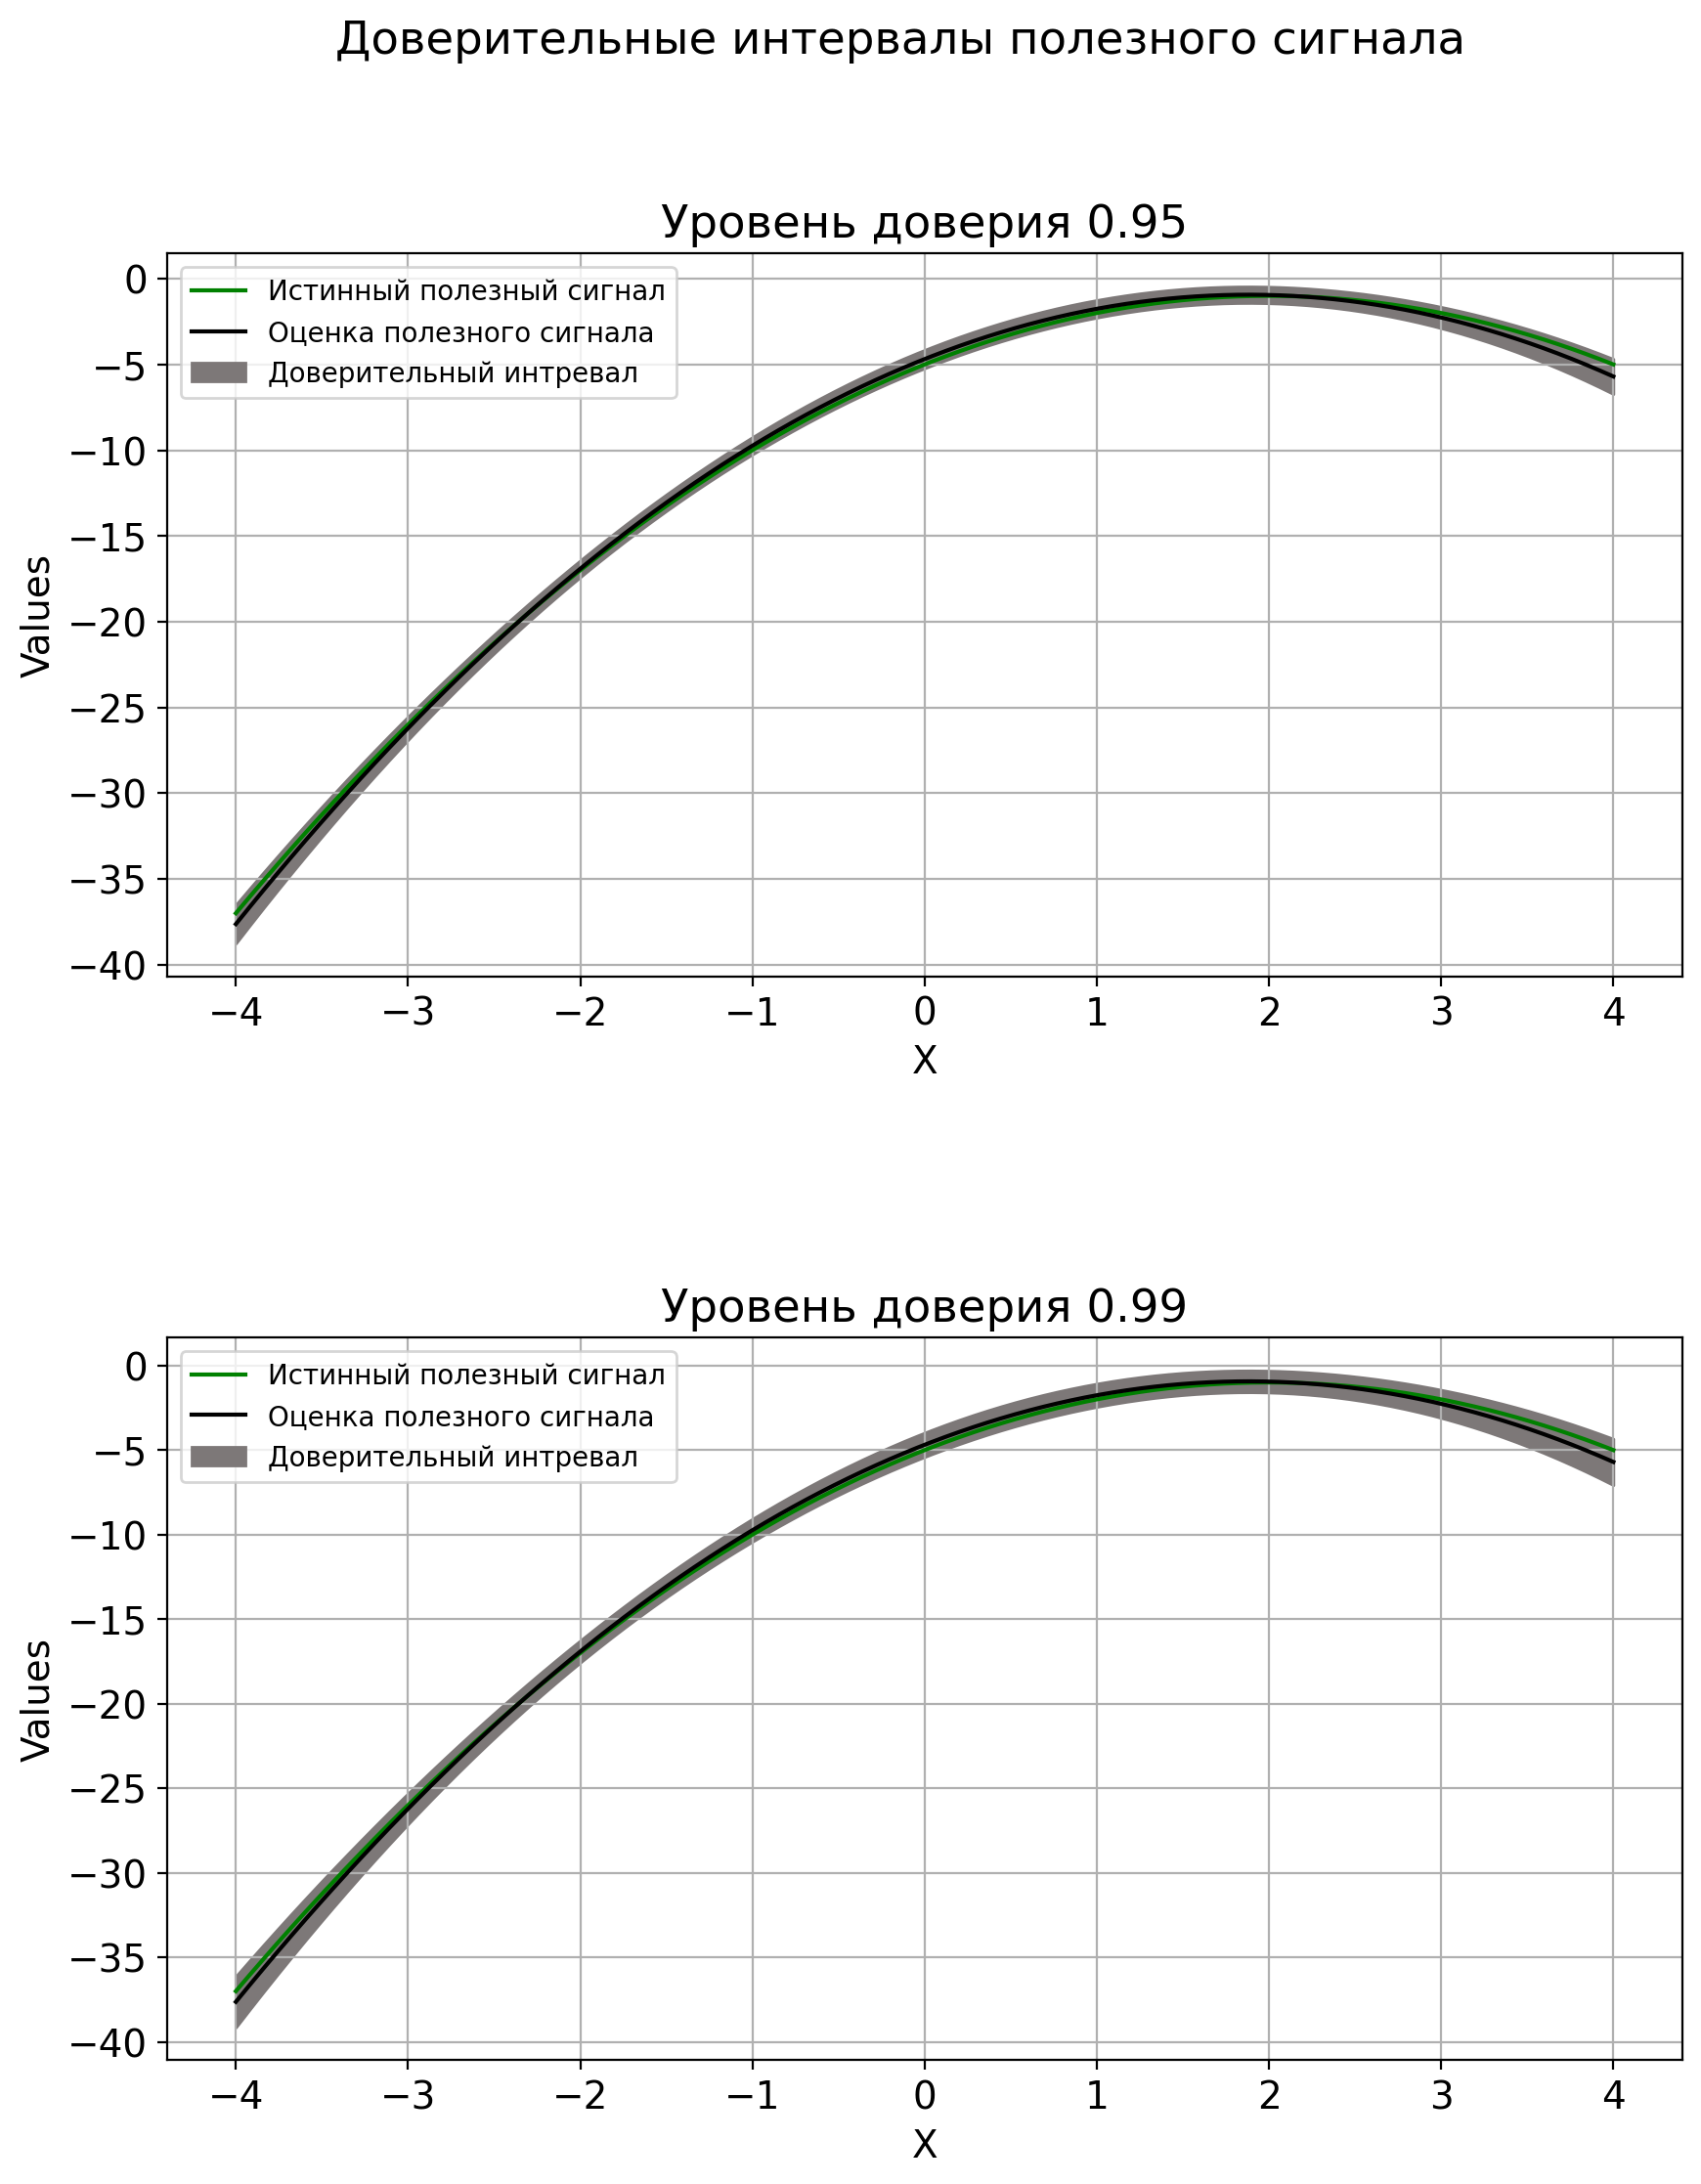

In [ ]:
plot_phi_intervals(norm.theta, norm.w, norm.m, limits)

### <center> № 5 <center>
Для определения числа столбцов воспользуемся формулой:
$$N_{cols} = 1 + floor(3.322lg(N))$$
$$N = 40 \Rightarrow N_{cols} = 6$$

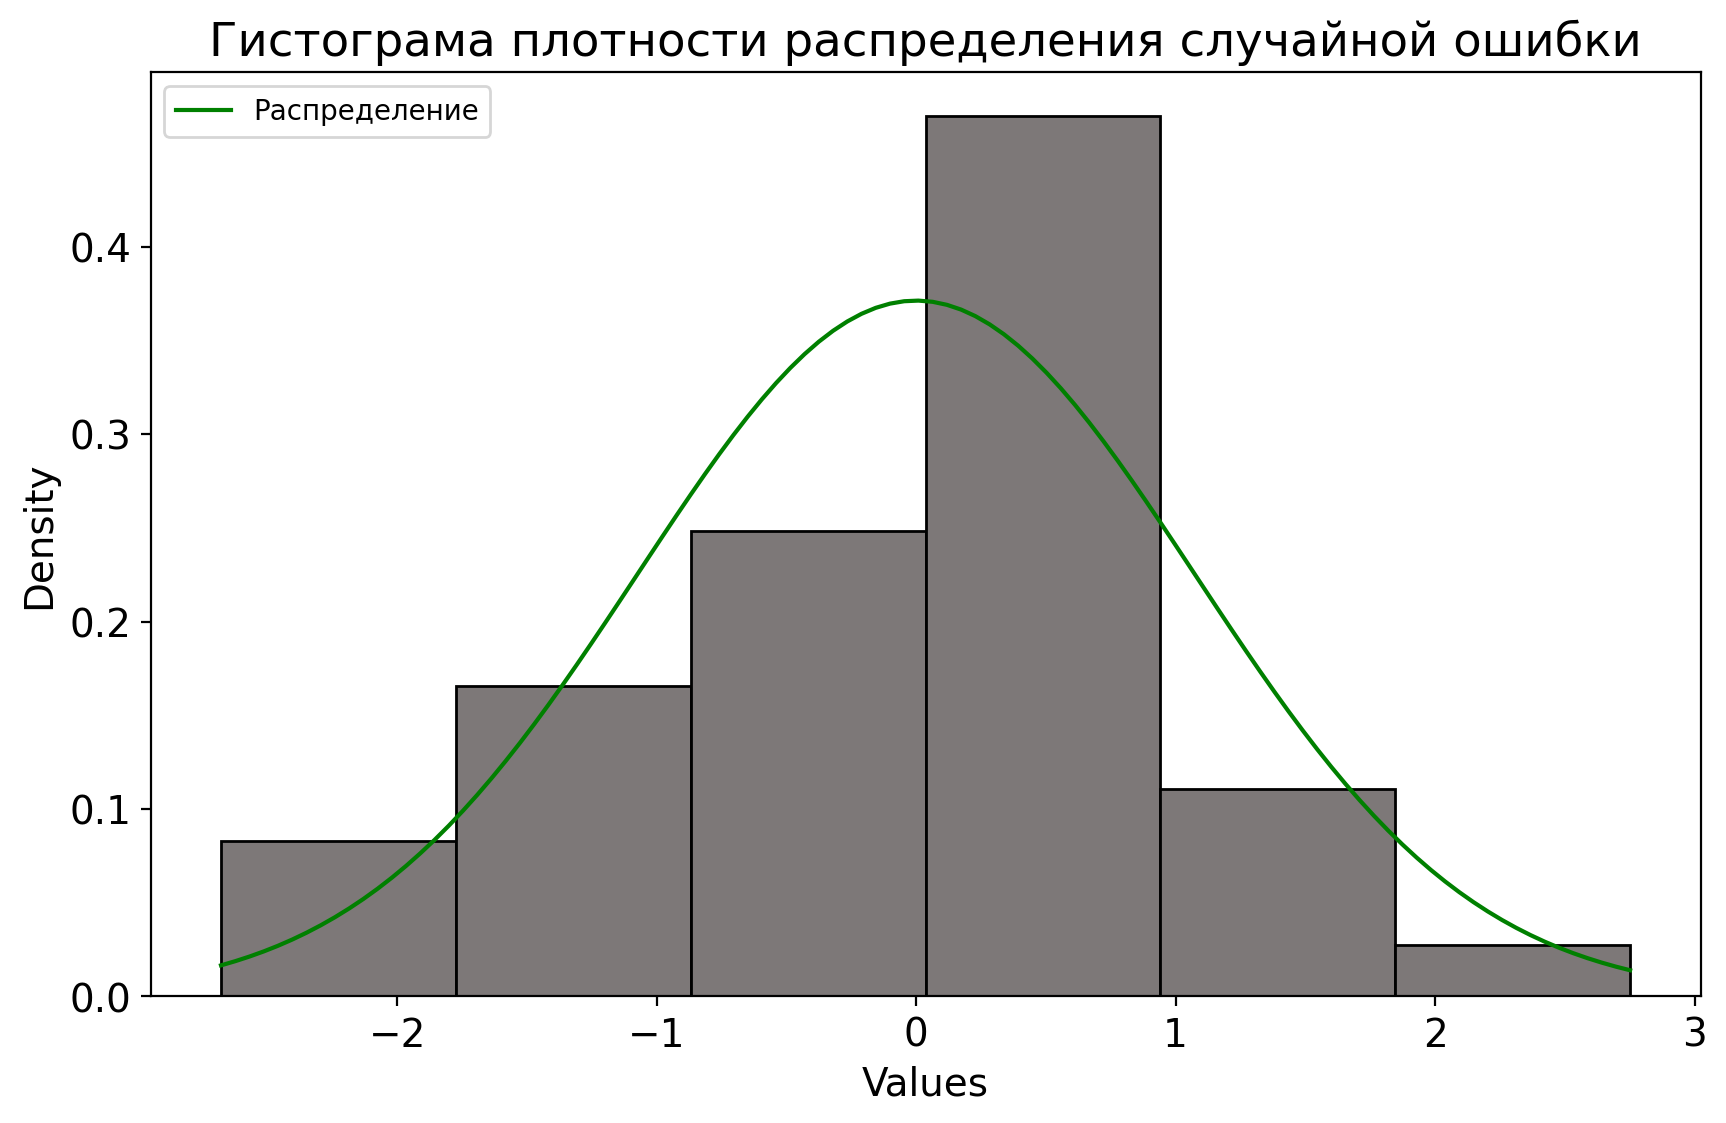

In [ ]:
plot_hist(norm.y, norm.y_pred, norm.n)

### <center> № 6 <center>

Вычислим оценку максимального правдоподобия дисперсии $\sigma^2$ при условии нормальности случайной ошибки:

$$\varepsilon\sim N(\mu, \sigma^2)$$
$$l(\sigma^2|y) = P(y|\sigma^2)$$
$$l(\sigma^2|y) = \prod_{i=1}^{n} p(y_i|\sigma^2) = \prod_{i=1}^{n}\frac{1}{\sqrt{2 \pi}\sigma}\exp(-\frac{1}{2 \sigma^2}(y_i - x_i^T \hat{\theta})^2)$$
$$log l(\sigma^2|y) = -\frac{n}{2}ln(2\pi) - \frac{n}{2}ln(\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^{n}(y_i - x_i^T\hat{\theta})^2$$
$$\frac{\partial log l(\sigma^2|y)}{\partial\sigma^2} = -\frac{n}{2} \frac{1}{\sigma^2} + \frac{1}{2\sigma^4}\sum_{i=1}^{n}(y_i - x_i^T\hat{\theta})^2 = 0$$
$$\hat{\sigma}^2 = \frac{\sum_{i=1}^{n}(y_i - x_i^T\hat{\theta})^2}{n}$$

In [ ]:
print(f"Случайная ошибка:")
print(norm.y - norm.y_pred)
print()
print(f"Оценка дисперсии случайной ошибки:")
estimate = np.sum((norm.y - norm.y_pred)**2) / norm.n
print(estimate)

Случайная ошибка:
[ 0.43593741 -1.16144712  1.55426356  0.02198697 -0.3291476  -0.96065713
  1.0881912  -1.19596446  0.65261479 -0.70385419 -0.09921158 -0.42466146
  0.44074238  0.59169461 -1.42537937  0.88026911  0.52584859  0.86398923
  1.35940705 -1.95088136  1.73678595 -2.05856423 -0.99675999  0.10388719
  0.90803784  0.47739831  0.21830786  0.46876759 -1.29656366 -0.02479918
  2.75142446 -2.67861186 -0.1349378   0.08397811 -0.71109943  0.19138106
  0.53652305  0.23580218  0.51750742 -0.4922055 ]

Оценка дисперсии случайной ошибки:
1.1541655567635283


### <center> № 7 <center>
Для проверки гипотезы о том, что закон распределения ошибки наблюдения является нормальным воспользуемся $\chi^2$-критерием Пирсона
\
Определим гипотезы:
\
$H_0: Ошибка \sim N(0, \sigma^2)$
\
$H_1: Ошибка \nsim N(0, \sigma^2)$
\
Расчитаем нужную нам статистику по формуле:
$$n\sum_{k=0}^{l}\frac{(\hat{p}_k-p_k)^2}{p_k}$$
где $p_k = P(t_{k+1}) - P(t_{k})$

$-\infty=t_o<t_1<\dots<t_l<t_{l+1} = \infty$

In [ ]:
p_value, chi2, confidence_interval, critical_interval = chi2_test(norm.x_k, norm.y, norm.y_pred, norm.n, 0.05)
print(f"Статистика X^2: {chi2}")
print(f"Доверительный интервал: {confidence_interval}")
print(f"Критический интервал: {critical_interval}")
print(f"P_value: {p_value}")
if p_value < 0.05:
    print("Отклоняем гипотезу о нормальности распределения остатков.")
else:
    print("Не отклоняем гипотезу о нормальности распределения остатков.")

Статистика X^2: 5.845236652785795
Доверительный интервал: (0, 12.591587243743977)
Критический интервал: (12.591587243743977, inf)
P_value: 0.4407483662949069
Не отклоняем гипотезу о нормальности распределения остатков.


#### <center>  Решим п. 1-7 для Равномерного распределения <center>

#### <center> Генерация данных <center>

In [ ]:
theta = np.array([-5, 4, -1, -0.02])
var = 1.1
n = 40
m = 2
normal_distribution = False
seed = 13

uni = Distribution(theta, var, n, m, normal_distribution, seed)

### <center> № 1 <center>

Найдем порядок  многочлена, используя критерий Стьюдента на уровне значимости 0.05.
\
Поряд многочлена отпределяется коэффициентом при $ x_k^m $.
\
Если $\theta_m = 0$, то порядок многочлена равен $m - 1$, иначе порядок многочлена $\ge m$
\
$H_0: \hat{\theta}_{\hat{m}} = 0$
\
$H_1: \hat{\theta}_{\hat{m}} \neq 0$
\
\
Для этого воспользуемся формулами:

$$MSE = \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{n - \hat{m} - 1}$$

$$SE = \sqrt{diag(MSE*(X^TX)^{-1})}$$

$$t_i = \frac{\hat{\theta}_i}{SE},$$
где:
\
$y_i$- Зависимая переменная для $i^{ого}$ объекта
\
$\hat{y}_i$- Предсказание модели для $i^{ого}$ объекта
\
$n$- Количество объектов
\
$\hat{m}$- Степень многочлена
\
$MSE$ - Среднеквадратичное отклонение, оценка дисперсии ошибок
\
$X$- Матрица признаков
\
$SE$- Стандартная ошибка
\
$\hat{\theta}_i$ - Оценка весов модели
\
$t_i$- Распределение Стьюдента с $n - \hat{m} - 1$ степенями свободы.


In [ ]:
estimate_m = 2
while t_test(uni.x_k, uni.y, estimate_m, 0.05):
    estimate_m += 1

Степень многочлена = 2 является статистически значимым.
Степень многочлена = 3 не является статистически значимым.
Степень многочлена равна 2


In [ ]:
uni = Distribution(theta, var, n, estimate_m - 1, normal_distribution, seed)

In [ ]:
for i in range(len(uni.w)):
    print(f'theta_{i} = {uni.w[i]}')

theta_0 = -5.467396626561425
theta_1 = 3.8226224187080717
theta_2 = -0.9154404439950137


In [ ]:
print("Шум")
print(uni.eps)

Шум
[ 1.74754047 -1.65161454  2.04063717  2.93089128  2.97400938 -0.29293705
  0.6861882   1.73384788  0.89115197  1.3971281  -2.92594685 -1.26832787
 -2.77821603  2.24693206 -0.80011092  1.13175674 -1.53369447 -0.95914902
 -3.08719337 -0.89148469  2.82608371 -1.77522009 -1.1365436   2.62898025
 -2.94566146 -2.73685911  0.81699482  2.35235308 -3.09157972  1.55167433
  1.96866353 -2.66994778  0.98455044  0.05828566 -0.12659086  2.86686117
 -3.14635082 -1.59222586  1.33554906 -1.10387939]


In [ ]:
print("Признак x")
print(uni.x_k)

Признак x
[-3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4 -2.2 -2.  -1.8 -1.6 -1.4 -1.2
 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6
  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  4. ]


In [ ]:
print("Зависимая переменная y")
print(uni.y)

Зависимая переменная y
[-32.89245953 -34.01161454 -28.11936283 -25.10910872 -23.02599062
 -24.33293705 -21.4738118  -18.62615212 -17.74884803 -15.6028719
 -18.36594685 -15.22832787 -15.33821603  -8.99306794 -10.80011092
  -7.70824326  -9.29369447  -7.71914902  -8.92719337  -5.89148469
  -1.41391629  -5.33522009  -4.0965436    0.18898025  -4.94566146
  -4.37685911  -0.54300518   1.19235308  -4.13157972   0.55167433
   0.92866353  -3.82994778  -0.37544956  -1.58171434  -2.12659086
   0.42686117  -6.10635082  -5.15222586  -2.90445094  -6.10387939]


Сравним с готовой реализацией в пакете STATSMODELS

In [ ]:
distr_packet = sm.OLS(uni.phi + uni.eps, sm.add_constant(uni.X))
distr_fitted = distr_packet.fit()
print(distr_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     443.7
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           1.39e-26
Time:                        19:03:21   Log-Likelihood:                -83.119
No. Observations:                  40   AIC:                             172.2
Df Residuals:                      37   BIC:                             177.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.4674      0.477    -11.472      0.0

### <center> № 2 <center>

Доверительный интервал для параметра $\theta_i$ с уровнем значимости $1 - \alpha$ будет иметь вид:
$$\hat{\theta_i} \pm t_{\alpha/2} * SE$$
$$MSE = \frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{n-\hat{m}-1}$$
$$SE = \sqrt{diag(MSE*(X^TX)^{-1})},$$
где:
\
$\theta_i$- Вес модели
\
$\hat{\theta}_i$ - Оценка весов модели
\
$t_{\alpha/2}$- $t_{\alpha/2}$- Квантиль уровня ${\alpha / 2}$ распределения Стьюдента с $(n - \hat{m} - 1)$ степенями свободы
\
$SE$- Стандартная ошибка
\
$\alpha$- Уровень значимости
\
$y_i$- Зависимая переменная для $i^{ого}$ объекта
\
$\hat{y}_i$- Предсказание модели для $i^{ого}$ объекта
\
$n$- Количество объектов
\
$\hat{m}$- Степень многочлена
\
$MSE$ - Среднеквадратичное отклонение, оценка дисперсии ошибок
\
$X$- Матрица признаков.

In [ ]:
for a in (0.95, 0.99):
    print(f"Уровень доверия {a}:")
    for i, w in enumerate(uni.w):
        l, r = calculate_confidence_interval_w(uni.se[i], w, uni.n, uni.m, a)
        print(f"\tTheta_{i}={w}:")
        print(f"\t\tДоверительный интервал {l, r}")
    print()

Уровень доверия 0.95:
	Theta_0=-5.467396626561425:
		Доверительный интервал (-6.433089899990812, -4.501703353132037)
	Theta_1=3.8226224187080717:
		Доверительный интервал (3.542427057206171, 4.102817780209973)
	Theta_2=-0.9154404439950137:
		Доверительный интервал (-1.0506255373016475, -0.7802553506883798)

Уровень доверия 0.99:
	Theta_0=-5.467396626561425:
		Доверительный интервал (-6.761573751814416, -4.173219501308433)
	Theta_1=3.8226224187080717:
		Доверительный интервал (3.4471176518890987, 4.198127185527045)
	Theta_2=-0.9154404439950137:
		Доверительный интервал (-1.096609206630523, -0.7342716813595042)



### <center> № 3 <center>

Доверительный интервал для полезного сигнала $f(x, w)$ с уровнем значимости $1 - \alpha$ будет иметь вид:

$$\hat{f}(x, w) \pm t_{\alpha / 2}\sqrt{MSE * x(X^T X)^{-1} x^T},$$
где:
\
$f(x, w)$- полезный сигнал
\
$x$- аргумент полезного сигнала
\
$w$- веса полезного сигнала
\
$t_{\alpha/2}$- $t_{\alpha/2}$- Квантиль уровня ${\alpha / 2}$ распределения Стьюдента с $(n - \hat{m} - 1)$ степенями свободы
\
$MSE$ - Среднеквадратичное отклонение, оценка дисперсии ошибок
\
$X$- Матрица признаков.

In [ ]:
limits = {}

In [ ]:
for alpha in (0.95, 0.99):
    print(f"Уровень доверия {alpha}:")
    interval, first_interval = calculate_confidence_interval_phi(norm.mse, norm.X, norm.w, norm.n, norm.m, alpha)
    l, r = interval
    l_first, r_first = first_interval
    limits[alpha] = (l[0], r[0])
    print("\tДоверительный интервал:")
    print('\t(')
    print(f"\t{l[0]}")
    print(f"\t{r[0]}")
    print('\t)')
    print(f'Значения в первой т. -3.8 {l_first, r_first}')
    print()

Уровень доверия 0.95:
	Доверительный интервал:
	(
	-1.06122297573263*x**2 + 3.99116860007975*x - 2.26330917533083*sqrt(x**2*(0.00110207507511744*x**2 - 0.000220415015023487*x - 0.00586303939962477) - 0.00586303939962477*x**2 + x*(-0.000220415015023487*x**2 + 0.00473451452270451*x + 0.000703564727954972) + 0.000703564727954972*x + 0.0562382739212008) - 4.68658186820528
	-1.06122297573263*x**2 + 3.99116860007975*x + 2.26330917533083*sqrt(x**2*(0.00110207507511744*x**2 - 0.000220415015023487*x - 0.00586303939962477) - 0.00586303939962477*x**2 + x*(-0.000220415015023487*x**2 + 0.00473451452270451*x + 0.000703564727954972) + 0.000703564727954972*x + 0.0562382739212008) - 4.68658186820528
	)
Значения в первой т. -3.8 (-36.19913585822091, -34.1550287779541)

Уровень доверия 0.99:
	Доверительный интервал:
	(
	-1.06122297573263*x**2 + 3.99116860007975*x - 3.03318149010857*sqrt(x**2*(0.00110207507511744*x**2 - 0.000220415015023487*x - 0.00586303939962477) - 0.00586303939962477*x**2 + x*(-0.00022

### <center> № 4 <center>

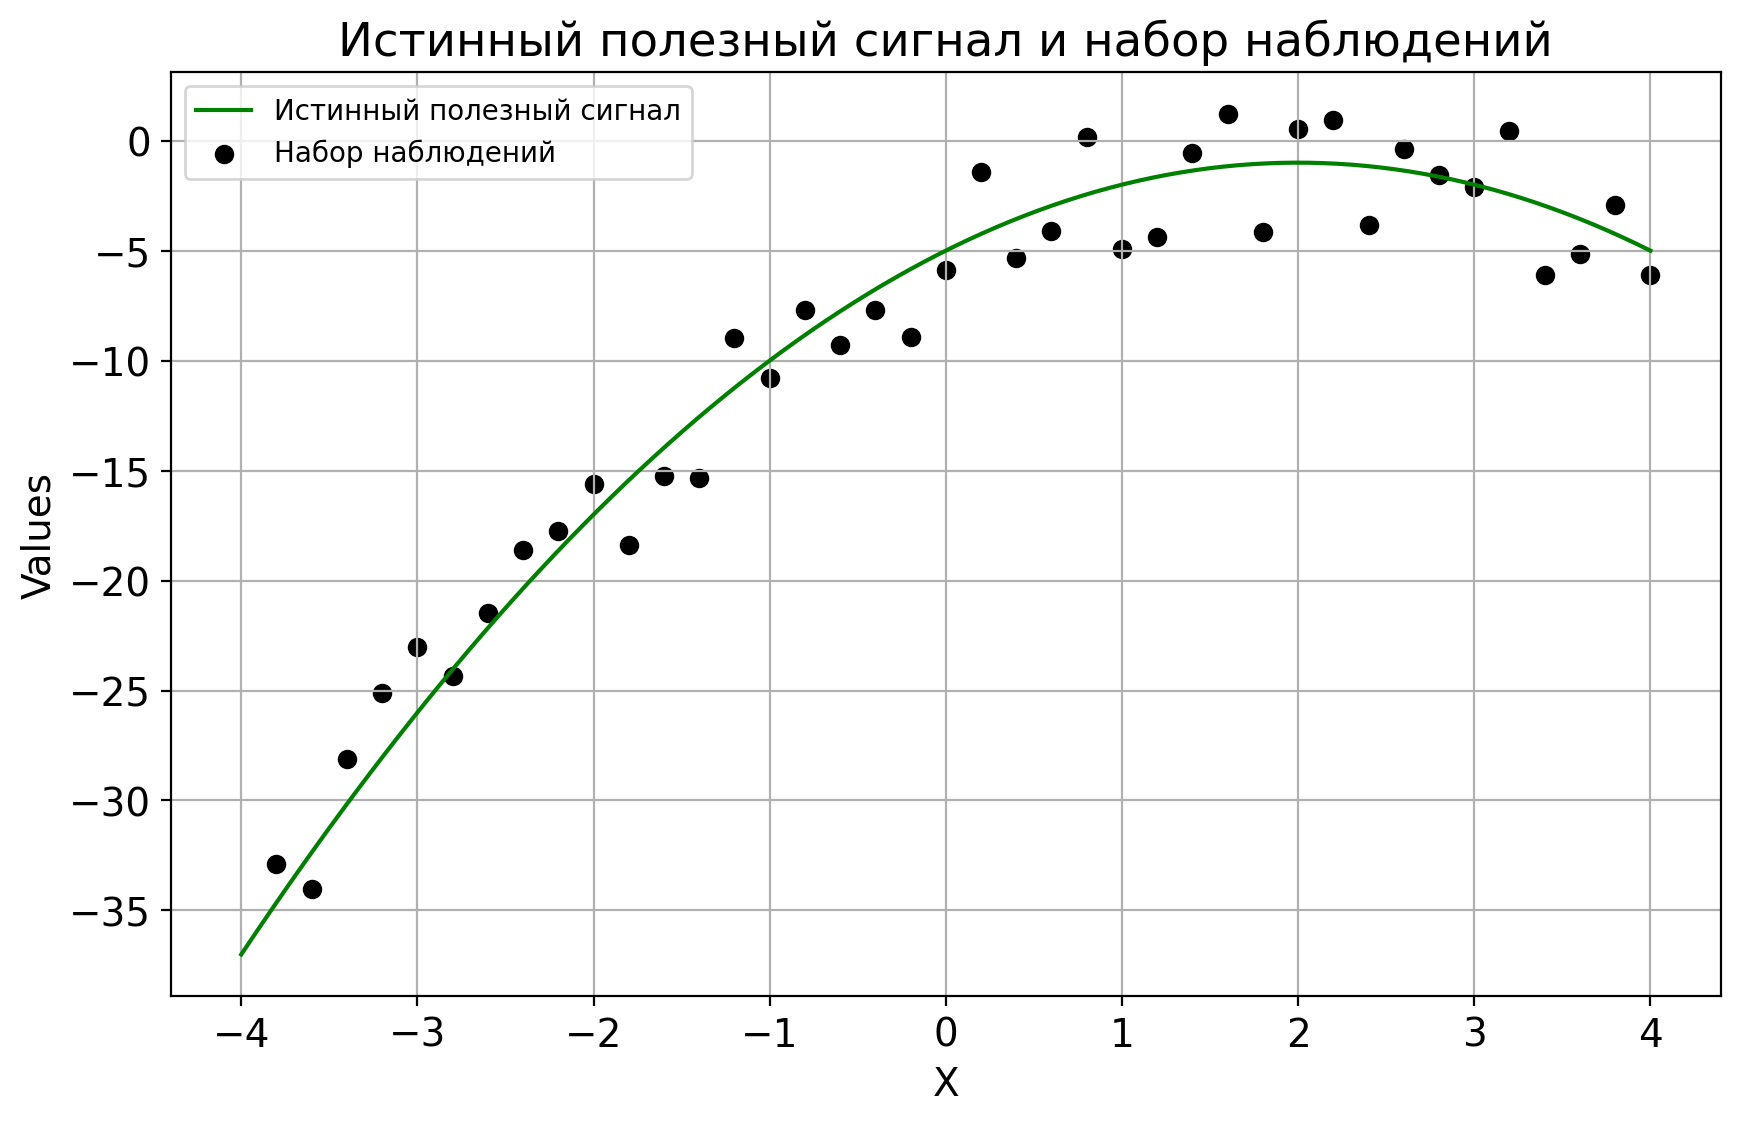

In [ ]:
plot_phi(uni.x_k, uni.theta, uni.y, uni.m)

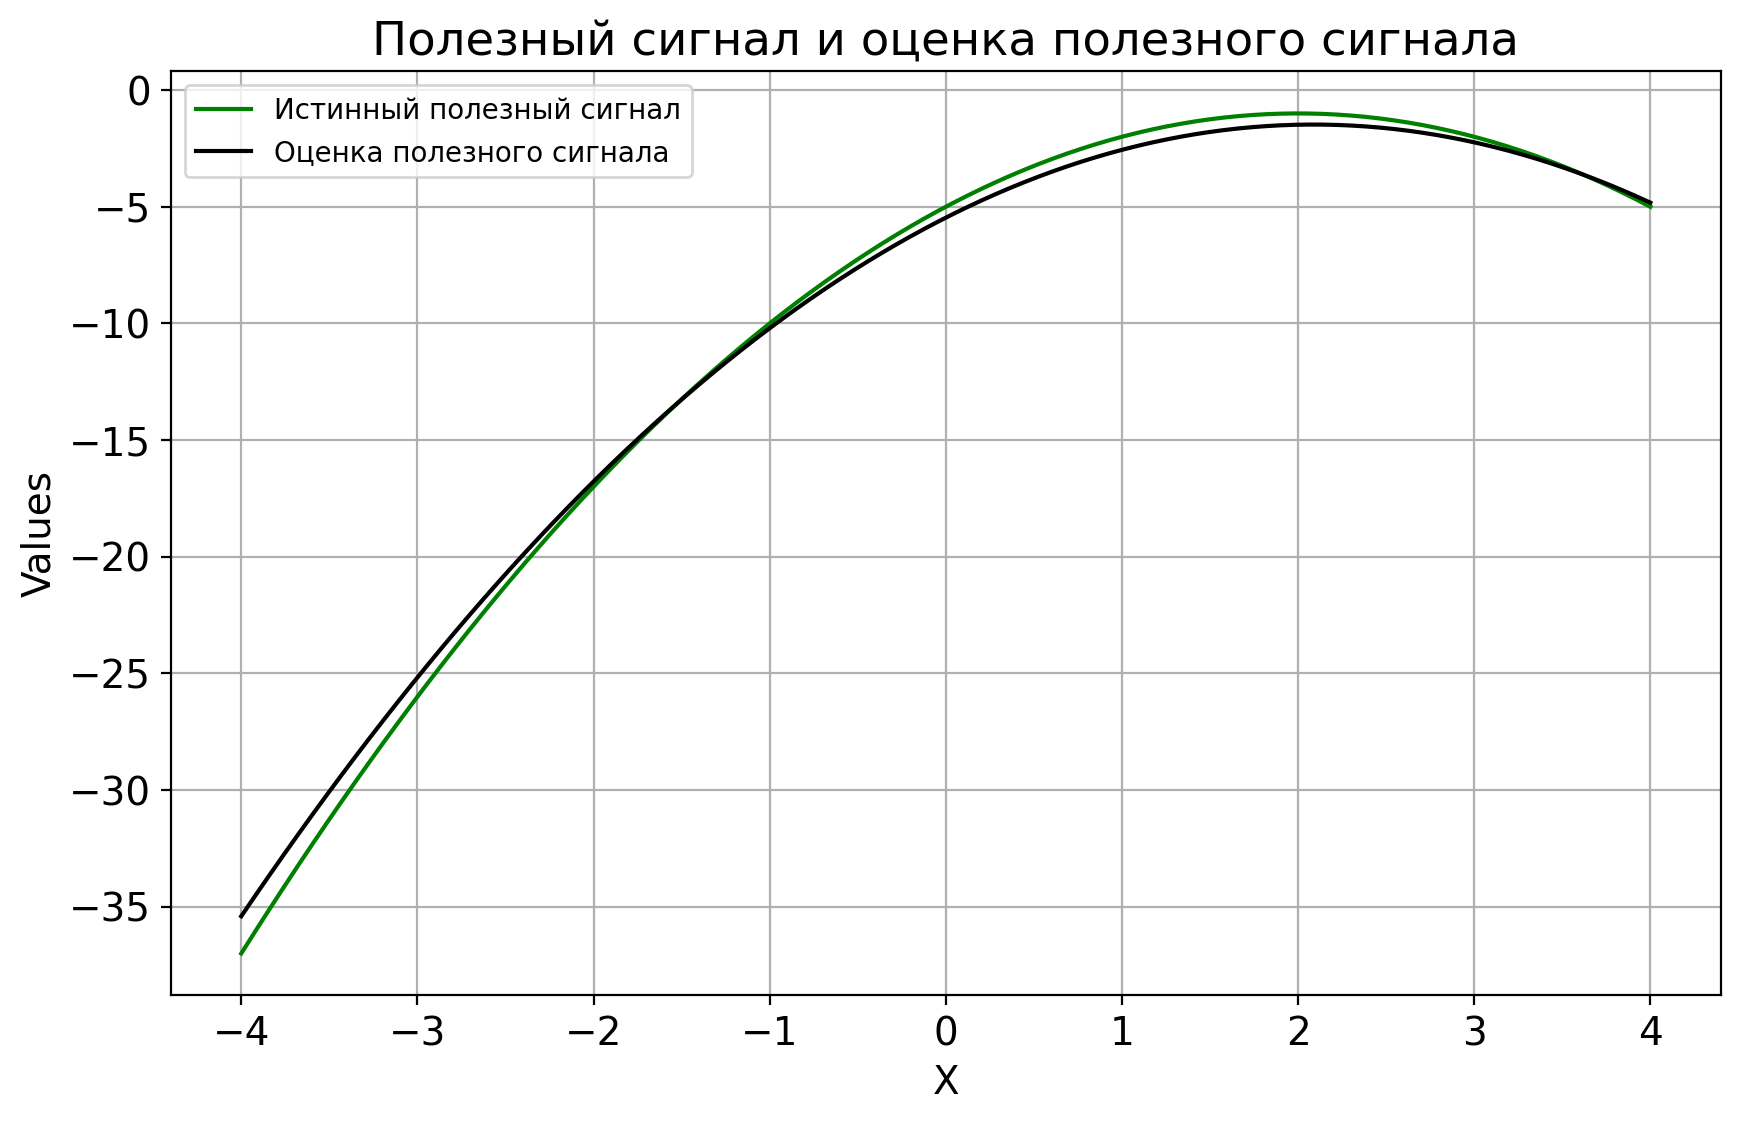

In [ ]:
plot_phi_estimation(uni.theta, uni.w, uni.m)

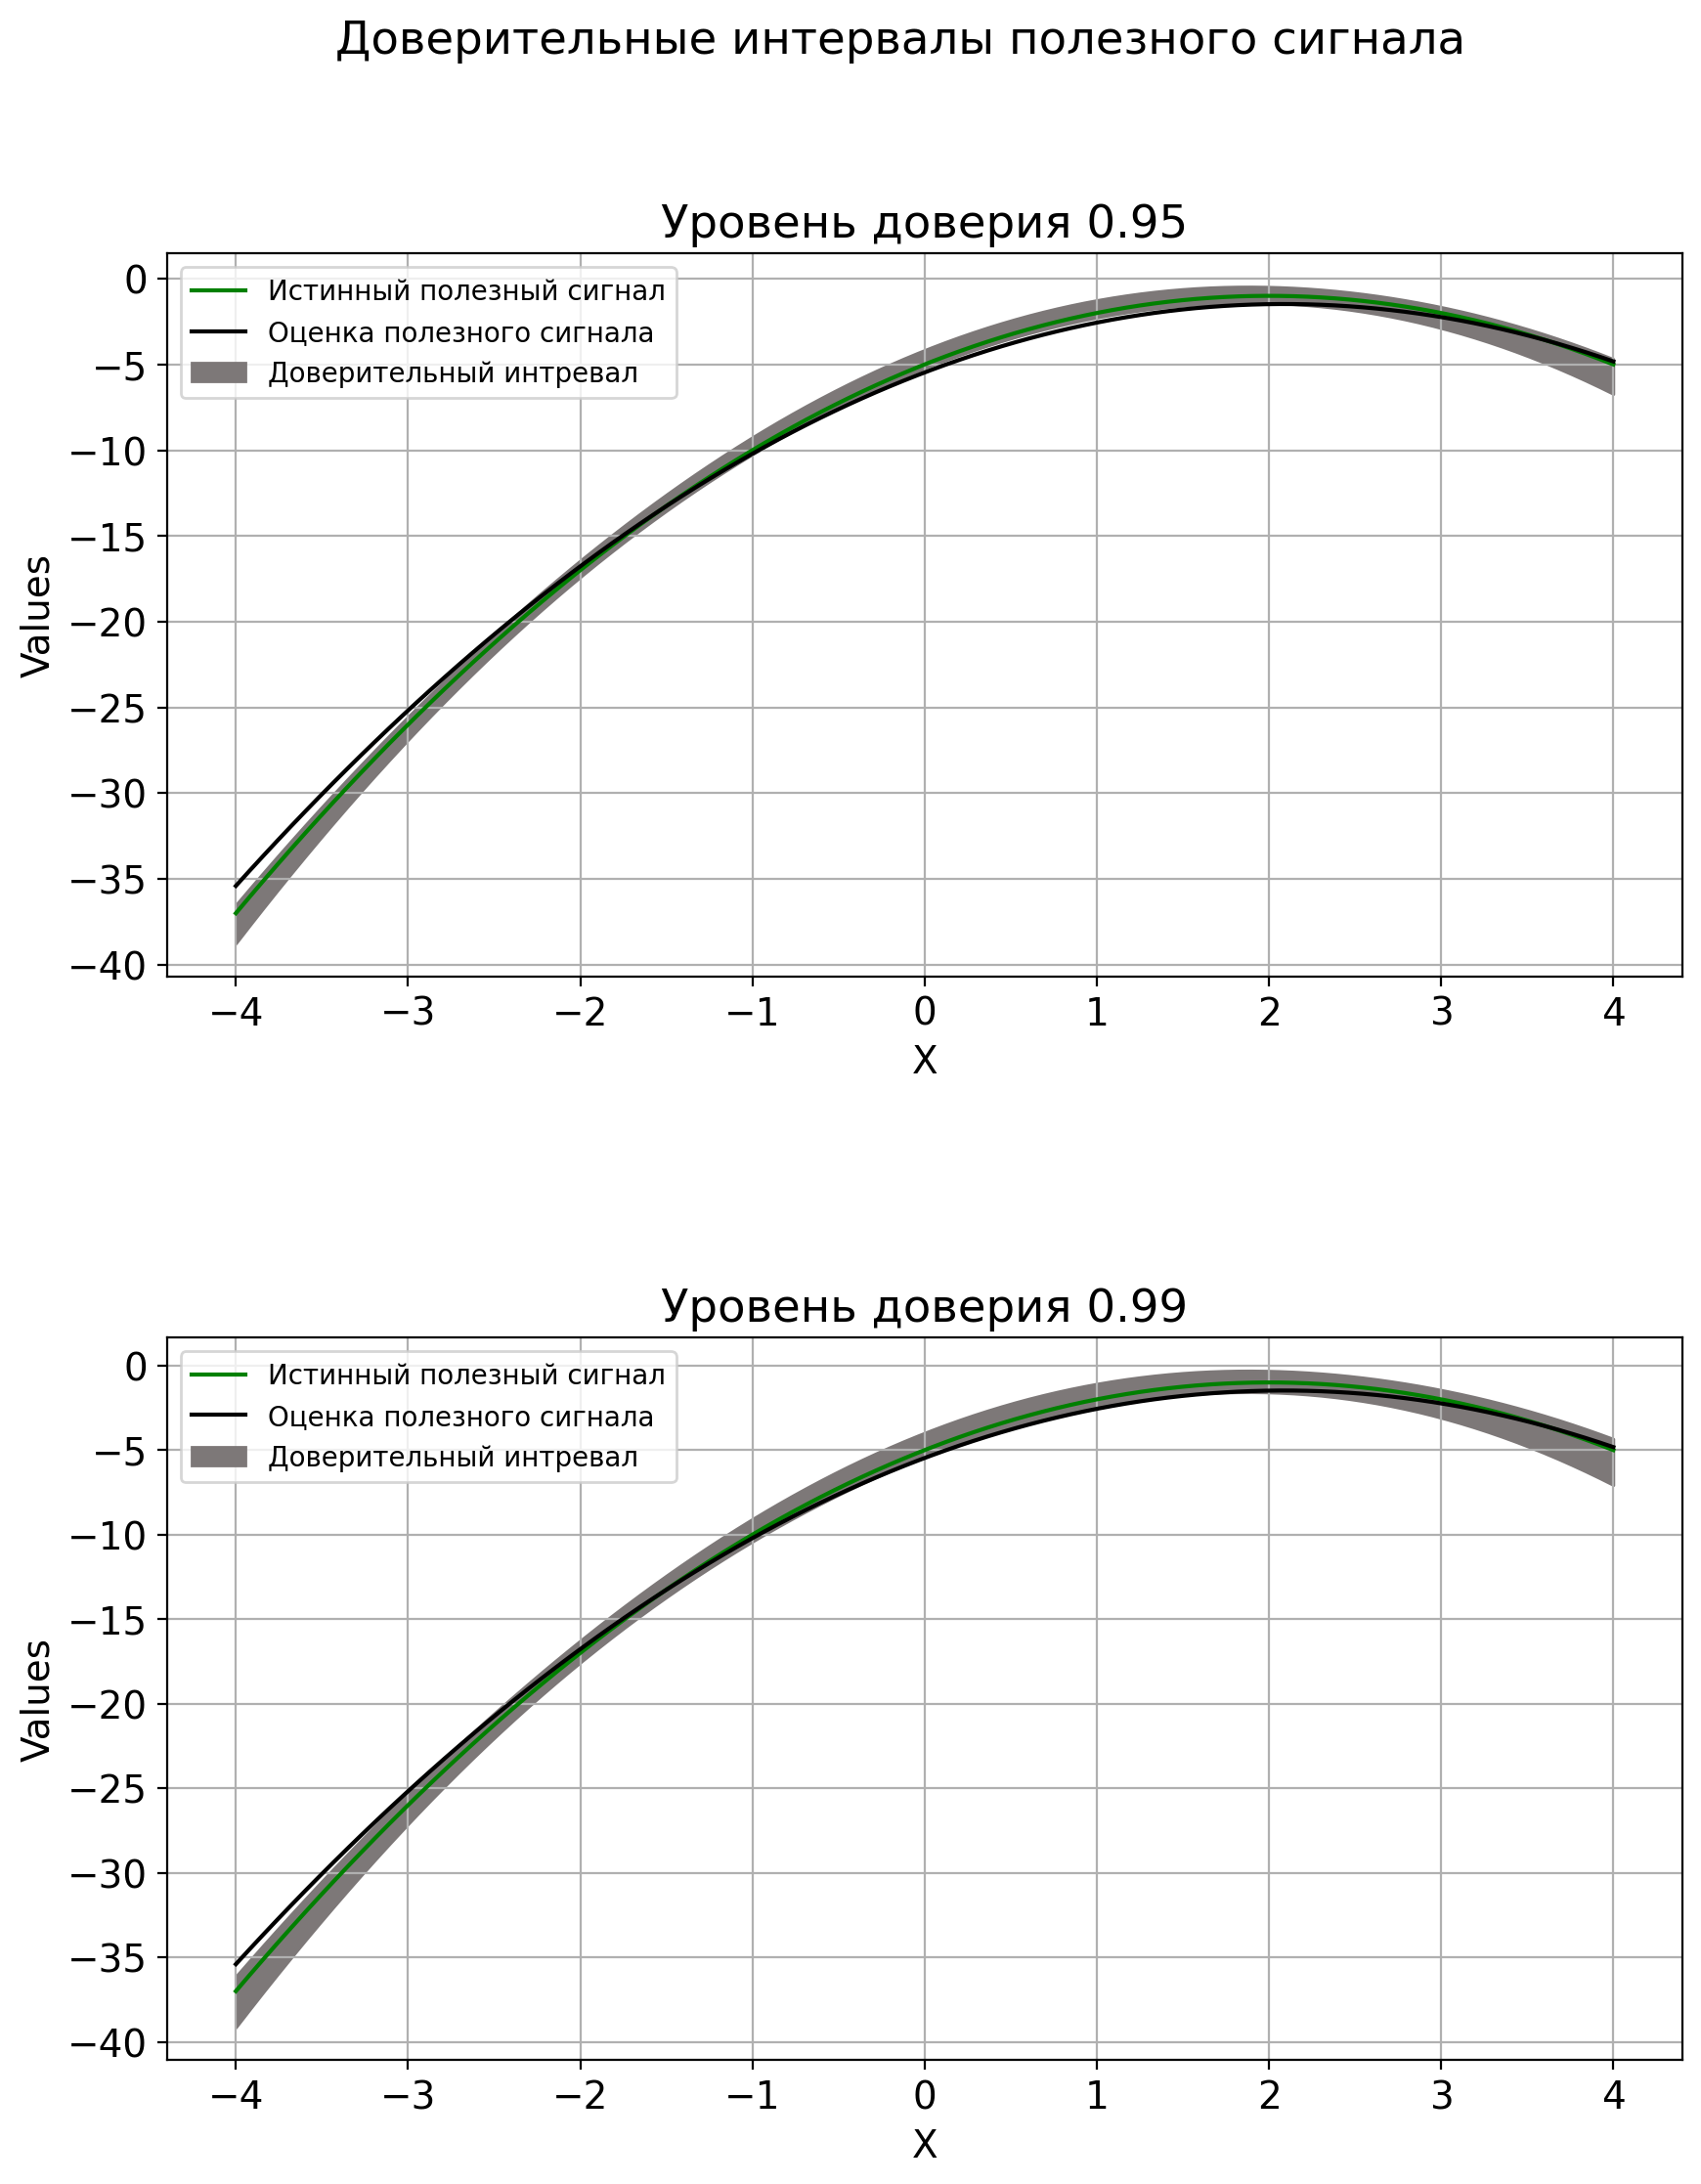

In [ ]:
plot_phi_intervals(uni.theta, uni.w, uni.m, limits)

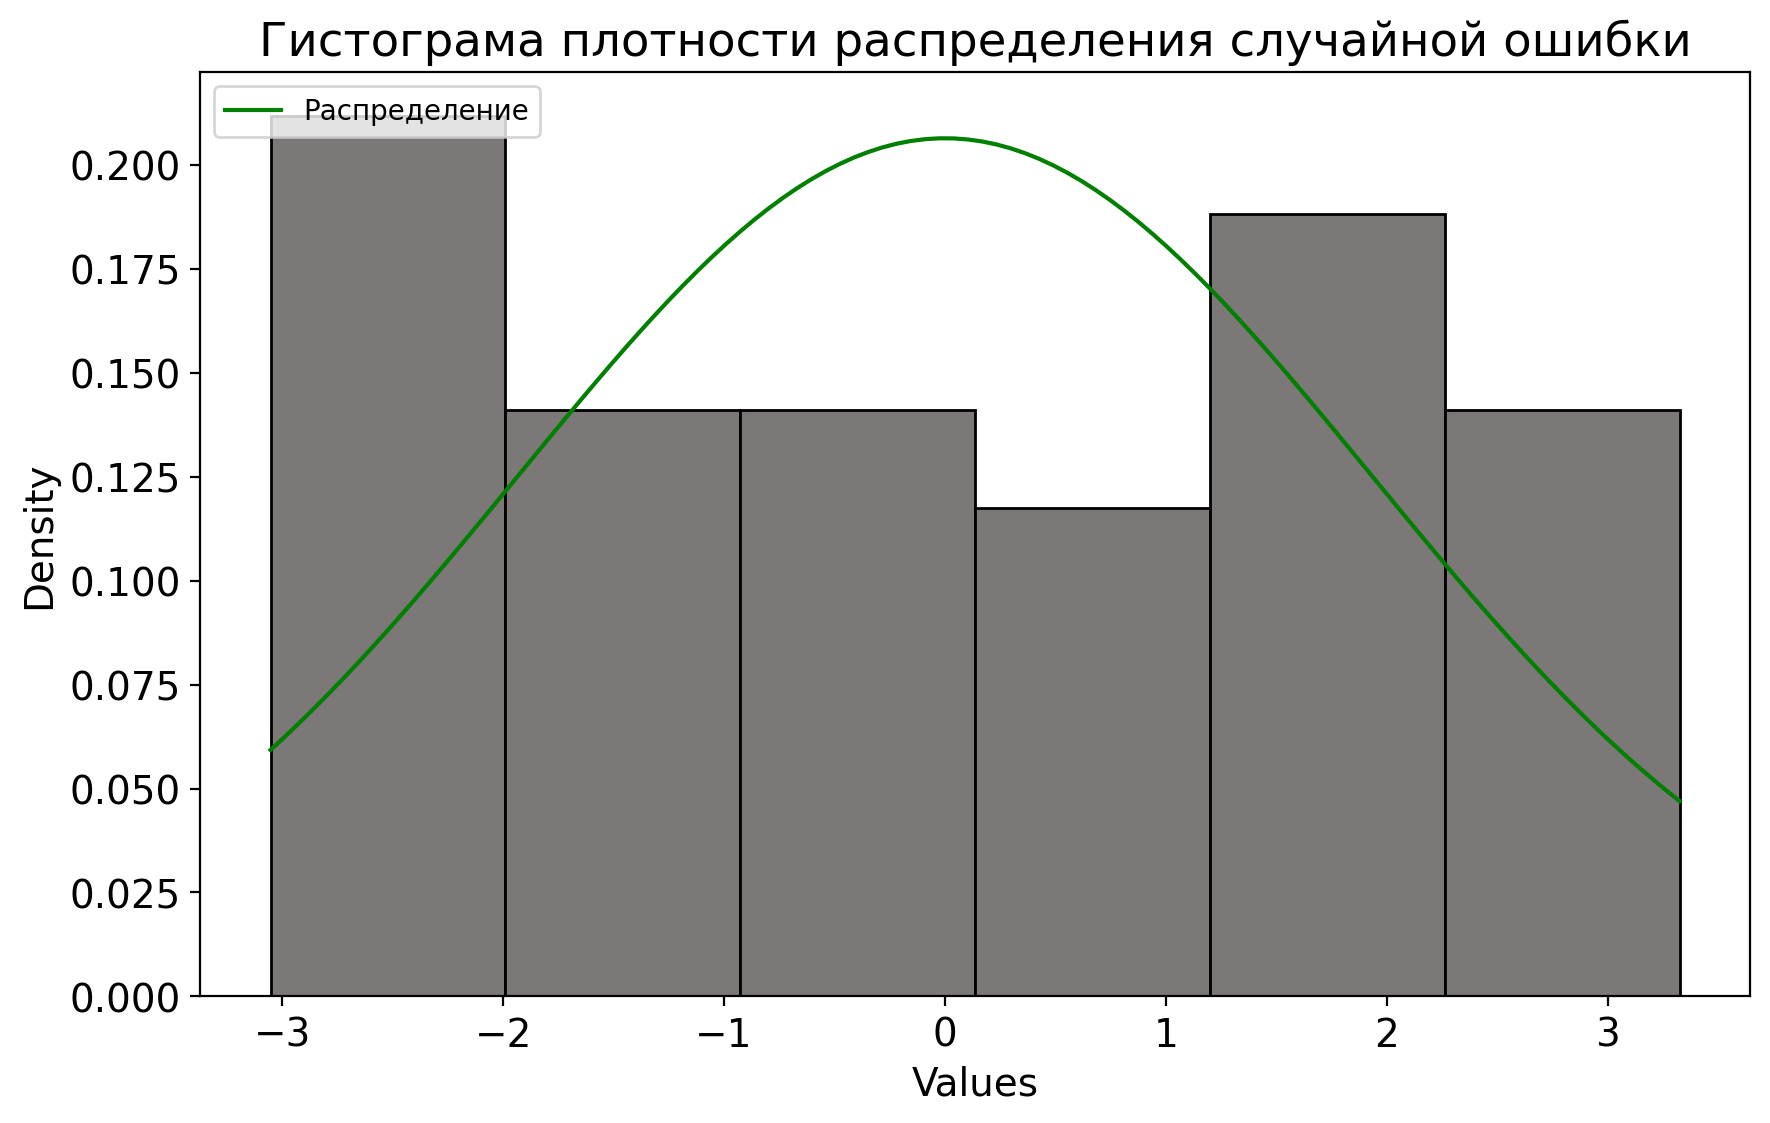

In [ ]:
plot_hist(uni.y, uni.y_pred, uni.n)

### <center> № 6 <center>

Вычислим оценку максимального правдоподобия дисперсии $\sigma^2$ при условии нормальности случайной ошибки:

$$\varepsilon\sim N(\mu, \sigma^2)$$
$$l(\sigma^2|y) = P(y|\sigma^2)$$
$$l(\sigma^2|y) = \prod_{i=1}^{n} p(y_i|\sigma^2) = \prod_{i=1}^{n}\frac{1}{\sqrt{2 \pi}\sigma}\exp(-\frac{1}{2 \sigma^2}(y_i - x_i^T \hat{\theta})^2)$$
$$log l(\sigma^2|y) = -\frac{n}{2}ln(2\pi) - \frac{n}{2}ln(\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^{n}(y_i - x_i^T\hat{\theta})^2$$
$$\frac{\partial log l(\sigma^2|y)}{\partial\sigma^2} = -\frac{n}{2} \frac{1}{\sigma^2} + \frac{1}{2\sigma^4}\sum_{i=1}^{n}(y_i - x_i^T\hat{\theta})^2 = 0$$
$$\hat{\sigma}^2 = \frac{\sum_{i=1}^{n}(y_i - x_i^T\hat{\theta})^2}{n}$$

In [ ]:
print(f"Случайная ошибка:")
print(uni.y - uni.y_pred)
print()
print(f"Оценка дисперсии случайной ошибки:")
estimate = np.sum((uni.y - uni.y_pred)**2)  / uni.n
print(estimate)

Случайная ошибка:
[ 0.3198623  -2.91866906  0.92744155  1.96478979  2.14823726 -0.98514457
  0.12078052  1.28847527  0.55904967  1.17153134 -3.05180283 -1.30120784
 -2.72488475  2.37970982 -0.59465143  1.40313318 -1.20316584 -0.57623296
 -2.65865464 -0.42408807  3.32557347 -1.25040196 -0.59316186  3.18416083
 -2.38544681 -2.17837515  1.36698333  2.88708137 -2.57887641  2.03558789
  2.41702258 -2.263908    1.34150617  0.3593926   0.1119025   3.0359762
 -3.05337888 -1.58216179  1.25594051 -1.27992533]

Оценка дисперсии случайной ошибки:
3.736171227148084


### <center> № 7 <center>
Для проверки гипотезы о том, что закон распределения ошибки наблюдения является нормальным воспользуемся $\chi^2$-критерием Пирсона
\
Определим гипотезы:
\
$H_0: Ошибка \sim N(0, \sigma^2)$
\
$H_1: Ошибка \nsim N(0, \sigma^2)$
\
Расчитаем нужную нам статистику по формуле:
$$n\sum_{k=0}^{l}\frac{(\hat{p}_k-p_k)^2}{p_k}$$
где $p_k = P(t_{k+1}) - P(t_{k})$

$-\infty=t_o<t_1<\dots<t_l<t_{l+1} = \infty$

In [ ]:
p_value, chi2, confidence_interval, critical_interval = chi2_test(uni.x_k, uni.y, uni.y_pred, uni.n, 0.05)
print(f"Статистика X^2: {chi2}")
print(f"Доверительный интервал: {confidence_interval}")
print(f"Критический интервал: {critical_interval}")
print(f"P_value: {p_value}")
if p_value < 0.05:
    print("Отклоняем гипотезу о нормальности распределения остатков.")
else:
    print("Не отклоняем гипотезу о нормальности распределения остатков.")

Статистика X^2: 30.8677902122583
Доверительный интервал: (0, 12.591587243743977)
Критический интервал: (12.591587243743977, inf)
P_value: 2.686585341593606e-05
Отклоняем гипотезу о нормальности распределения остатков.


### <center> Литература <center>

[Matburo.ru](https://www.matburo.ru/tv_book.php): Для поиска информации.
\
\
[Statlect.com](https://www.statlect.com/): Для поиска информации.
\
\
[Huggingface.co](https://huggingface.co/chat/): Для поиска информации и разметки Markdown полей.
\
\
[Openai.com](https://chat.openai.com): Для поиска информации и разметки Markdown полей.
